## Using LSTM to Predict Stock Price using the Past 60 Days

In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from models.SelfFeedLSTM import SelfFeedLSTM

Mount the Google Drive if running on Colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Set the data path

In [ ]:
path = "drive/My Drive/Colab Notebooks/StockPrediction/dataSample" # Example Google Drive path

Load type1 data (similar to the provided sample)

In [ ]:
data = pd.read_csv(f"{path}/Bahman.Inv..csv", index_col='<DTYYYYMMDD>', parse_dates=True, engine='python')
data = data.drop(['<TICKER>', '<PER>', '<OPENINT>', '<VALUE>', '<FIRST>', '<LAST>'], axis=1)
data = data.iloc[::-1]
data = data[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']]
data = data.rename_axis('timestamp')
data = data.rename(columns={'<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close', '<VOL>':'volume'})

Load type 2 data

In [3]:
import os
files = [f"{path}/{f}" for f in os.listdir(path)]
data = []
for file in files:
            df = pd.read_csv(file, index_col='<DTYYYYMMDD>', parse_dates=True, engine='python')
            df = df.drop(['<TICKER>', '<PER>', '<OPENINT>', '<VALUE>', '<FIRST>', '<LAST>'], axis=1)
            df = df.iloc[::-1]
            df = df[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']]
            df = df.rename_axis('timestamp')
            df = df.rename(columns={'<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close', '<VOL>':'volume'})
            df.filter(['close'])
            data.append(df.values)

Mounted at /content/drive


In [4]:
lstm = SelfFeedLSTM(data)
lstm.train()
train, valid = lstm.predict()

Epoch 1/10
3/3 [==============================] - 1s 312ms/step - loss: 0.0043
Epoch 2/10
3/3 [==============================] - 1s 312ms/step - loss: 0.0023
Epoch 3/10
3/3 [==============================] - 1s 309ms/step - loss: 8.6502e-04
Epoch 4/10
3/3 [==============================] - 1s 307ms/step - loss: 0.0012
Epoch 5/10
3/3 [==============================] - 1s 305ms/step - loss: 7.5263e-04
Epoch 6/10
3/3 [==============================] - 1s 305ms/step - loss: 4.2836e-04
Epoch 7/10
3/3 [==============================] - 1s 299ms/step - loss: 4.7700e-04
Epoch 8/10
3/3 [==============================] - 1s 299ms/step - loss: 1.6495e-04
Epoch 9/10
3/3 [==============================] - 1s 296ms/step - loss: 2.3639e-04
Epoch 10/10
3/3 [==============================] - 1s 302ms/step - loss: 1.1593e-04
221.02922832361887


/content/models/SelfFeedLSTM.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


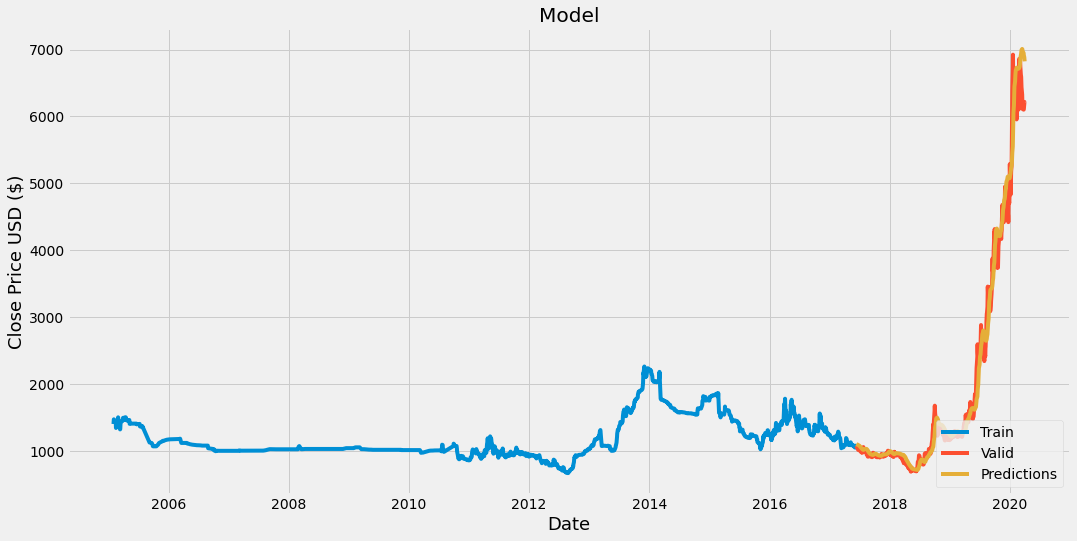

In [5]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()